In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [13]:
train_dir = "petImages"
val_dir = "train"

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 24943 images belonging to 2 classes.


In [16]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 16 images belonging to 2 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
173/780 ━━━━━━━━━━━━━━━━━━━━ 9:17 919ms/step - accuracy: 0.5219 - loss: 0.8153

C:\Users\areba\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


780/780 ━━━━━━━━━━━━━━━━━━━━ 725s 914ms/step - accuracy: 0.6035 - loss: 0.6787 - val_accuracy: 0.8125 - val_loss: 0.4302
Epoch 2/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 722s 926ms/step - accuracy: 0.7557 - loss: 0.4953 - val_accuracy: 0.8750 - val_loss: 0.3904
Epoch 3/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 528s 676ms/step - accuracy: 0.8103 - loss: 0.4088 - val_accuracy: 0.8750 - val_loss: 0.3828
Epoch 4/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 471s 604ms/step - accuracy: 0.8462 - loss: 0.3491 - val_accuracy: 0.7500 - val_loss: 0.3373
Epoch 5/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 462s 592ms/step - accuracy: 0.8899 - loss: 0.2668 - val_accuracy: 0.7500 - val_loss: 0.3037
Epoch 6/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 462s 592ms/step - accuracy: 0.9347 - loss: 0.1671 - val_accuracy: 0.8125 - val_loss: 0.2775
Epoch 7/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 468s 600ms/step - accuracy: 0.9692 - loss: 0.0883 - val_accuracy: 0.8750 - val_loss: 0.2516
Epoch 8/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 470s 603ms/step - accuracy: 0.9823 - loss: 0.05

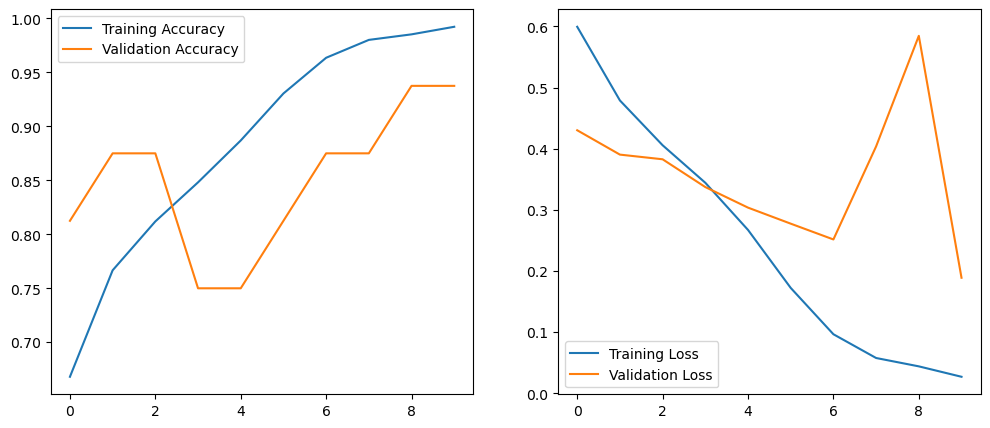

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

plt.show()


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [32]:
img_path = 'train/Cat/1122.jpg'

In [33]:
img = image.load_img(img_path, target_size=(150, 150))  # Resize
img_array = image.img_to_array(img)                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension
img_array /= 255.0 

In [37]:
prediction = model.predict(img_array)
confidence = prediction[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [1]:
if confidence > 0.5:
    label = "DOG"
    confidence_percent = confidence * 100
else:
    label = "CAT"
    confidence_percent = (1 - confidence) * 100
print(f"Prediction: {label}")

# Show image with prediction
plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()

NameError: name 'confidence' is not defined